In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os

##
from matplotlib.colors import LinearSegmentedColormap

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [204]:
plt.style.use('default')

In [10]:
df = pd.read_csv("../data/clean/aggregate_df.csv")

df_customers = pd.read_csv("../data/clean/customers.csv")
df_orders = pd.read_csv("../data/clean/orders.csv")
df_items = pd.read_csv("../data/clean/order_items.csv")
df_products = pd.read_csv("../data/clean/products.csv")

In [ ]:
### reload

#df_orders = pd.read_csv("../data/clean/orders.csv")
#df = pd.read_csv("../data/clean/aggregate_df.csv")

In [3]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

=== MAIN DF ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.company              4194 non-null   object 
 4   Customers.create_date          4194 non-null   object 
 5   Customers.mailing              4194 non-null   int64  
 6   Customers.last_modified        4194 non-null   object 
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.company                 730 non-null    object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.reorder_id              82 non-null     float64
 12  Orders.subtotal                4

In [11]:
#df.head(10)

In [8]:
# # overview of the dataframe
    
# display(
#     "Shape",
#     df.shape,
#     "Description",
#     df.describe().round(2).T,
#     "Duplicates",
#     df.duplicated().sum(),
# )


In [5]:
display(
    "=== CUSTOMERS ===",
    df_customers.describe().round(2).T,
    df_customers.shape,


    "=== ORDERS ===",
    df_orders.describe().round(2).T,
    df_orders.shape,

    "=== ORDER ITEMS ===",
    df_items.describe().round(2).T,
    df_items.shape,


    "=== PRODUCTS ===",
    df_products.describe().round(2).T,
    df_products.shape
    )



'=== CUSTOMERS ==='

,count,mean,std,min,25%,50%,75%,max
Customers.id,3054.0,1899.90,1073.24,3.0,972.25,1926.5,2818.75,3736.0
Customers.mailing,3054.0,0.46,0.50,0.0,0.00,0.0,1.00,1.0


(3054, 7)

'=== ORDERS ==='

,count,mean,std,min,25%,50%,75%,max
Orders.id,3565.0,9036.67,5311.46,23.00,4177.00,9398.00,13973.00,17437.00
Orders.customer_id,3565.0,1793.49,1076.45,3.00,851.00,1751.00,2713.00,3736.00
Orders.reorder_id,63.0,7549.14,3656.41,30.00,4673.00,6887.00,11014.50,16201.00
Orders.subtotal,3565.0,109.82,206.22,2.89,32.63,63.61,124.74,5163.04
Orders.tax,3159.0,0.67,4.10,0.00,0.00,0.00,0.00,132.93
Orders.shipping,3390.0,7.22,4.51,0.00,0.00,9.95,9.95,32.81
Orders.coupon_id,640.0,20.59,11.65,4.00,12.00,26.00,32.00,48.00
Orders.coupon_amount,640.0,9.20,14.51,0.00,1.52,5.00,10.76,109.90
Orders.discount_amount,343.0,13.46,52.82,0.02,3.43,6.71,9.95,588.04
Orders.total,3565.0,115.37,195.56,2.89,39.99,70.74,129.96,4627.95


(3565, 24)

'=== ORDER ITEMS ==='

,count,mean,std,min,25%,50%,75%,max
Order_Items.id,4194.0,11156.07,5802.47,31.00,5847.25,11770.00,16482.75,20202.0
Order_Items.parent,4194.0,9142.98,5276.54,23.00,4258.00,9641.00,14011.75,17437.0
Order_Items.product_id,4151.0,4451.43,5577.39,1.00,1009.00,1867.00,4345.50,26175.0
Order_Items.qty,4194.0,1.86,8.82,1.00,1.00,1.00,1.00,500.0
Order_Items.price,4194.0,67.35,95.57,1.12,24.03,43.46,74.99,1899.0
Order_Items.cost,4194.0,51.09,74.13,0.28,16.20,32.50,59.50,1350.0
Order_Items.reorder_frequency,24.0,1.67,0.92,1.00,1.00,1.00,2.00,4.0


(4194, 8)

'=== PRODUCTS ==='

,count,mean,std,min,25%,50%,75%,max
Products.id,1710.0,6266.13,6393.83,1.00,1324.50,3078.50,11310.00,26175.00
Products.import_id,1710.0,3.83,2.84,1.00,3.00,3.00,4.00,21.00
Products.list_price,1692.0,127.08,333.87,1.02,27.40,58.01,116.38,8439.00
Products.price,1709.0,71.70,124.22,1.54,21.05,39.68,71.72,1899.00
Products.sale_price,146.0,67.43,97.96,2.89,19.03,39.97,69.88,659.99
Products.cost,1710.0,52.65,93.95,0.28,12.50,27.99,53.83,1350.00
Products.case_qty,831.0,181.09,538.76,1.00,1.00,6.00,80.00,5000.00


(1710, 16)

In [15]:
### ---  Column structuring --- 

id_cols = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_cols = ['Customers.fname', 'Customers.lname', 'Customers.company', 
            'Orders.company', 'Orders.discount_name', 'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_cols = ['Customers.mailing', 'Order_Items.qty']


category_cols = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.discount_name',
                'Orders.payment_method', 'Orders.payment_status', 'Orders.status', 
                'Products.status', 'Products.vendor', 'Products.shopping_brand', 'Products.taxable'
                ]

date_cols = ['Orders.placed_date', 'Orders.payment_date', 'Orders.updated_date',
             'Orders.shipped_date', 'Customers.create_date', 'Customers.last_modified'
             ]

In [16]:
dfs = [df, df_orders, df_customers, df_items, df_products]

for data in dfs:
    for col in id_cols:
        if col in data.columns:
            data[col] = data[col].astype("object")

    for col in category_cols:
        if col in data.columns:
            data[col] = data[col].astype("category")

    for col in integer_cols:
        if col in data.columns:
            data[col] = data[col].astype("int64")

    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')



In [17]:
########################################################################################
backup_df = df.copy()
backup_df_orders = df_orders.copy()
backup_df_customers = df_customers.copy()
backup_df_items = df_items.copy()
backup_df_products = df_products.copy()

In [ ]:
#df = backup_df
#df_orders = backup_df_orders
########################################################################################

* * *

## CUSTOMER

In [18]:
print("Customers: ", df_customers['Customers.id'].nunique())

business_customers = (df_customers['Customers.company'] != "Individual").sum()
print("Business Customers:", business_customers)

business_company = df_customers['Customers.company'].nunique() - 1 # ohne Individual
print("Business Company: ", business_company)

individual_customers = (df_customers['Customers.company'] == "Individual").sum()
print("Individual Customers:", individual_customers) 

Customers:  3054
Business Customers: 464
Business Company:  428
Individual Customers: 2590


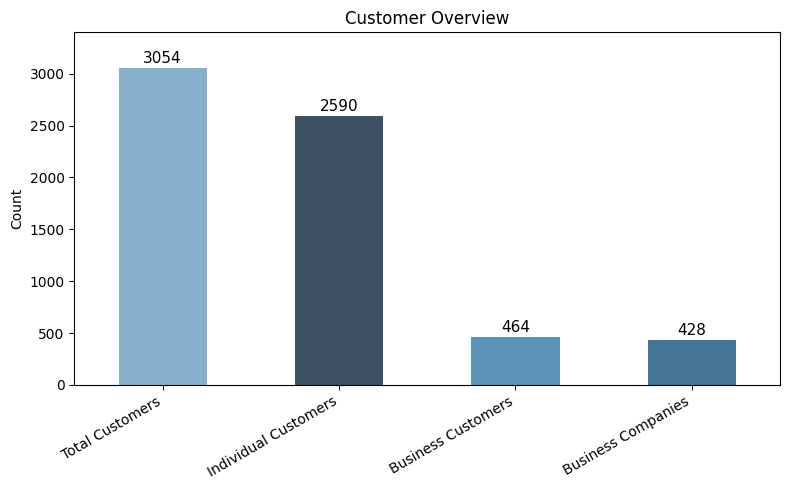

In [19]:
metrics = {
    "Total Customers": df_customers['Customers.id'].nunique(),
    "Business Customers": (df_customers['Customers.company'] != "Individual").sum(),
    "Business Companies": df_customers['Customers.company'].nunique() - 1,
    "Individual Customers": (df_customers['Customers.company'] == "Individual").sum()
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=["Category", "Count"])

# Desired order
order = [
    "Total Customers",
    "Individual Customers",
    "Business Customers",
    "Business Companies"
]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_metrics,
    x="Category",
    y="Count",
    width=0.5,
    hue="Category",
    palette="Blues_d",
    order=order
)

# Add labels
for index, row in df_metrics.set_index("Category").loc[order].iterrows():
    plt.text(order.index(index), row["Count"] + 50, str(row["Count"]),
             ha='center', fontsize=11)

plt.ylim(0, 3400)
plt.title("Customer Overview")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [25]:
df['is_individual'] = df['Customers.company'] == "Individual"
df['is_business'] = df['Customers.company'] != "Individual"

orders_comp_unique = (
    df
    .drop_duplicates(subset="Orders.id")
    .loc[:, ["Orders.id", "Orders.total", "is_individual", "is_business"]]
)

individual_revenue = orders_comp_unique.loc[orders_comp_unique['is_individual'], 'Orders.total'].sum()
business_revenue   = orders_comp_unique.loc[orders_comp_unique['is_business'], 'Orders.total'].sum()

print(f"Individual revenue: {individual_revenue:,.2f} USD")
print(f"Business revenue: {business_revenue:,.2f} USD")

Individual revenue: 308,740.34 USD
Business revenue: 102,538.42 USD


Individual share: 75.07 %
Business share: 24.93 %


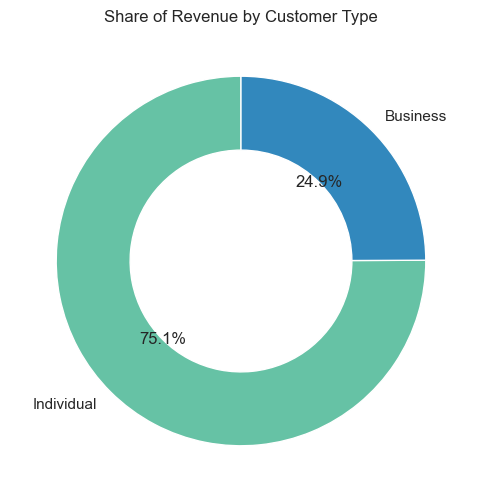

In [190]:
total_revenue = df_orders['Orders.total'].sum()

print("Individual share:", round((individual_revenue / total_revenue * 100),2), "%")
print("Business share:", round((business_revenue / total_revenue * 100),2), "%")

sizes = [individual_revenue, business_revenue]
labels = ["Individual", "Business"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=["#66c2a5", "#3288bd"], wedgeprops={'width':0.4})

plt.title("Share of Revenue by Customer Type")
plt.show()

In [192]:
# df_customers['is_business'] = df_customers['Customers.company'] != "Individual"

# orders_by_type = (
#     df_orders
#     .merge(
#         df_customers[['Customers.id', 'is_business']],
#         left_on='Orders.customer_id',
#         right_on='Customers.id',
#         how='left'
#     )
#     .groupby('is_business')['Orders.total']
#     .mean()
# )
# customer_counts

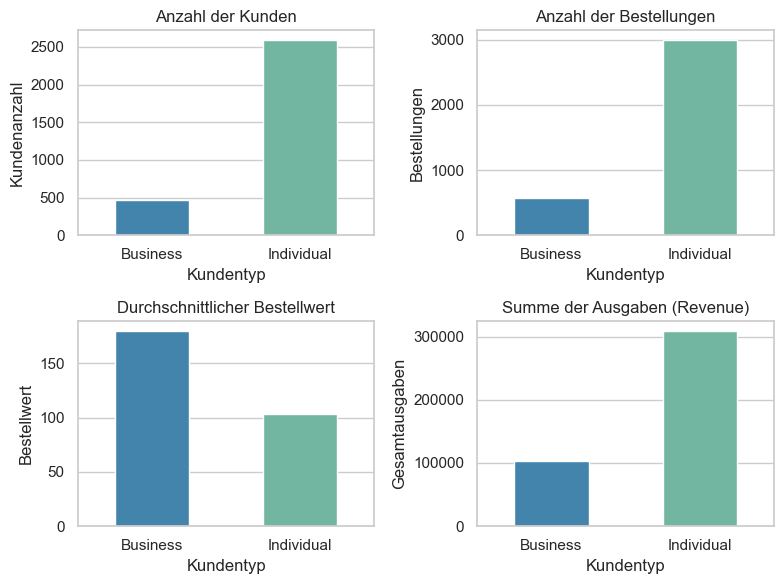

In [195]:
# ==================CUSTOMER DATA========================
df_customers['customer_type'] = np.where(df_customers['Customers.company'] == "Individual","Individual","Business")

customer_counts = df_customers['customer_type'].value_counts().sort_values()
customer_counts = customer_counts.reset_index()
customer_counts.columns = ['customer_type', 'customer_count']

# =================== ORDER DATA =======================

# Join customer type (temporary, for analysis only)
orders_with_type = df_orders.merge(df_customers[['Customers.id', 'is_business']],
    left_on='Orders.customer_id',
    right_on='Customers.id',
    how='left'
)
orders_with_type['customer_type'] = orders_with_type['is_business'].map(arg={False: 'Individual', True: 'Business'})

# ---- Mean order value ----
mean_values = (orders_with_type.groupby('customer_type')['Orders.total'].mean().reset_index())

# ---- Order count ----
order_counts = (orders_with_type.groupby('customer_type')['Orders.id'].count().reset_index(name='order_count'))

# =================== Total spent =======================

total_spent = (orders_with_type.groupby('customer_type')['Orders.total'].sum().reset_index(name='total_spent'))



# =================== PLOT =======================
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# === (1) CUSTOMER COUNT ===
sns.barplot(
    data=customer_counts,
    x='customer_type', y='customer_count',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False,  width=0.5,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Anzahl der Kunden")
axes[0, 0].set_xlabel("Kundentyp")
axes[0, 0].set_ylabel("Kundenanzahl")

# === (2) ORDER COUNT ===
sns.barplot(
    data=order_counts,
    x='customer_type', y='order_count',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False, width=0.5,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Anzahl der Bestellungen")
axes[0, 1].set_xlabel("Kundentyp")
axes[0, 1].set_ylabel("Bestellungen")

# === (3) MEAN ORDER VALUE ===
sns.barplot(
    data=mean_values,
    x='customer_type', y='Orders.total',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False, width=0.5,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Durchschnittlicher Bestellwert")
axes[1, 0].set_xlabel("Kundentyp")
axes[1, 0].set_ylabel("Bestellwert")

# === (4) TOTAL SPENT ===
sns.barplot(
    data=total_spent,
    x='customer_type', y='total_spent',
    hue='customer_type', palette={'Individual': '#66c2a5', 'Business': '#3288bd'},
    legend=False, width=0.5,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Summe der Ausgaben (Revenue)")
axes[1, 1].set_xlabel("Kundentyp")
axes[1, 1].set_ylabel("Gesamtausgaben")

plt.tight_layout()
plt.show()

In [32]:
# # --- 1. Усі унікальні компанії ---
# companies = sorted(df['Orders.company'].dropna().unique())
# #companies = df['Orders.company'].dropna().unique()


# # --- 2. Генеруємо кольори ---
# palette = sns.color_palette("tab20c", len(companies))  #   +"tab20"   tab20+sort  tab20c+sort
  
# # --- 3. Створюємо словник: компанія → колір ---
# company_colors = dict(zip(companies, palette))


# # --- 4. Top-10 компаній ---
# top_company_count = df['Orders.company'].value_counts().head(10)
# top_company_total = (
#     df.groupby('Orders.company')['Orders.total']
#       .sum()
#       .sort_values(ascending=False)
#       .head(10)
# )


# # --- 5. Кольори для топ-10 ---
# colors_count = top_company_count.index.map(company_colors).tolist()
# colors_total = top_company_total.index.map(company_colors).tolist()


# # === Візуалізація ===
# plt.figure(figsize=(14, 5))

# # LEFT — COUNT
# plt.subplot(1, 2, 1)
# sns.barplot(
#     x=top_company_count.values,
#     y=top_company_count.index,
#     palette=colors_count
# )
# plt.title("Top 10 Orders.company (Count)")
# plt.xlabel("Orders Count")
# plt.ylabel("Company")


# # RIGHT — TOTAL REVENUE
# plt.subplot(1, 2, 2)
# sns.barplot(
#     x=top_company_total.values,
#     y=top_company_total.index,
#     palette=colors_total
# )
# plt.title("Top 10 Orders.company (Total Revenue)")
# plt.xlabel("Total Revenue ($)")
# plt.ylabel("")

# plt.tight_layout()
# plt.show()


* * *
## ORDER

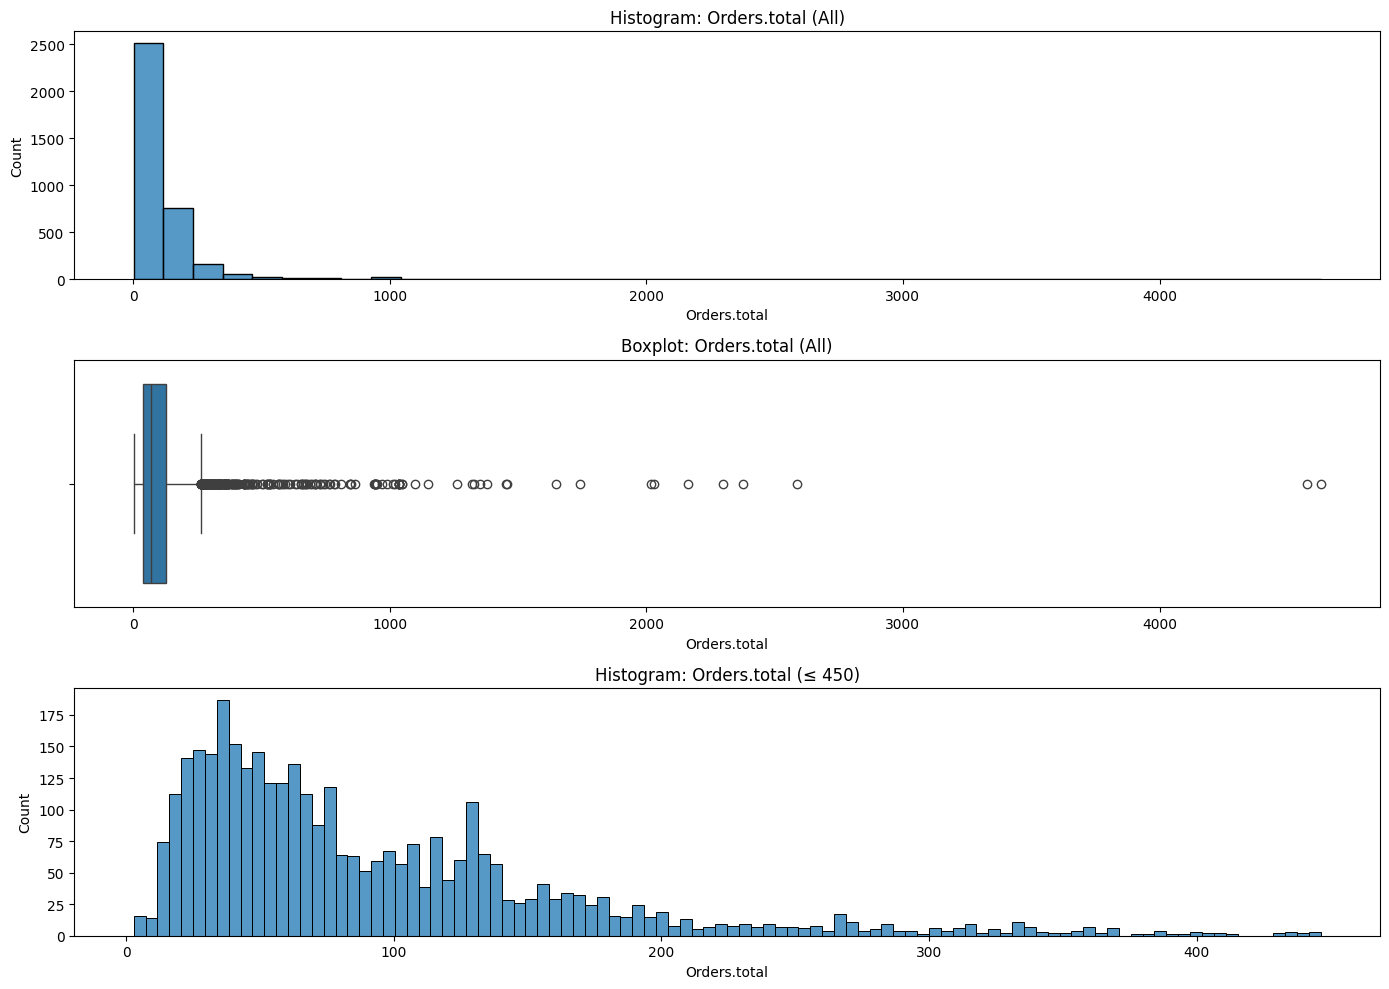

In [220]:
plt.figure(figsize=(14, 10))

# =================== 1. Histogram: all Orders.total 
plt.subplot(3, 1, 1)
sns.histplot(df_orders['Orders.total'], bins=40)
plt.title('Histogram: Orders.total (All)')

# =================== 2. Boxplot: all Orders.total 
plt.subplot(3, 1, 2)
sns.boxplot(x=df_orders['Orders.total'])
plt.title('Boxplot: Orders.total (All)')

# =================== 3. Histogram: Orders.total <= 450 
plt.subplot(3, 1, 3)
sns.histplot(df_orders[df_orders['Orders.total'] <= 450]['Orders.total'], bins=100)
plt.title('Histogram: Orders.total (≤ 450)')

plt.tight_layout()
plt.show()

In [199]:
print("-------------------------------------------------------\n")
print("               Bestellstatus nach Zahlungsstatus  \n")


ct_status = pd.crosstab(df_orders["Orders.status"], df_orders["Orders.payment_status"])
ct_status

-------------------------------------------------------

               Bestellstatus nach Zahlungsstatus  



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.status,,,,
Cancelled,13,11,0,0
Completed,3295,0,4,18
Error,1,0,0,0
On Hold,12,0,0,0
Pending,7,15,0,0
Refunded,101,9,1,0
Shipped,53,2,0,2
Unknown,3,1,0,0
Validation Required,17,0,0,0


In [93]:
print("--------------------------------------------------------\n")
print("              Zahlungsart nach Zahlungsstatus  \n")
ct_pay_method = pd.crosstab(df_orders["Orders.payment_method"], df_orders["Orders.payment_status"])
ct_pay_method

--------------------------------------------------------

              Zahlungsart nach Zahlungsstatus  



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,2,0,0,0
Check,24,0,0,0
Credit Card,360,0,5,6
PayPal,281,0,0,0
authorize.net,2835,38,0,0


In [84]:
df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
df_orders["has_shipping"] = (df_orders["Orders.shipping"] > 0).astype(int)
df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)

# discount_name є завжди, але треба перевірити, чи там "No Discount", "" або NaN
df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

In [198]:
print("----------------------------------------------------------------------------\n")
print("                      Orders.status  nach  Feature-Indikatoren  \n")

ct_features = df_orders.groupby("Orders.status", observed=True)[[
    "has_reorder",
    "has_tax",
    "has_shipping",
    "has_coupon",
    "has_discount"
]].sum()

ct_features

----------------------------------------------------------------------------

                      Orders.status  nach  Feature-Indikatoren  



,has_reorder,has_tax,has_shipping,has_coupon,has_discount
Orders.status,,,,,
Cancelled,1,1,17,3,0
Completed,61,235,2322,598,258
Error,0,0,0,0,0
On Hold,0,1,7,2,3
Pending,0,2,9,3,1
Refunded,0,7,67,22,2
Shipped,1,12,41,5,3
Unknown,0,0,3,0,0
Validation Required,0,3,10,7,0


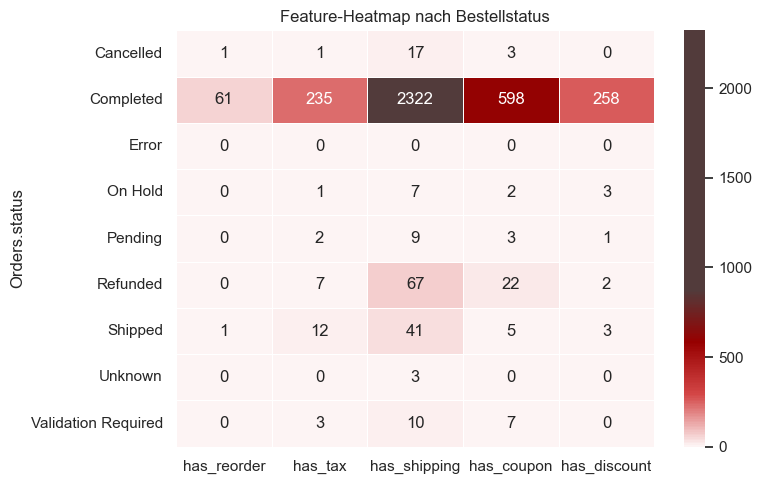

In [201]:
# # ---------- 1. Бінарні колонки ----------
# df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
# df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
# df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)
# df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

# # ---------- 2. Крос-таблиця ----------
# ct_features = df_orders.groupby("Orders.status")[[
#     "has_reorder",
#     "has_tax",
#     "has_shipping",
#     "has_coupon",
#     "has_discount"
# ]].sum()


# ---------- 3. Heatmap ----------
from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#fdf4f4",  # 0%
    "#D34646",  # 10%
    "#970000",  # 25%
    "#523B3B",  
    "#523B3B",  # 50%
    "#523B3B", 
    "#523B3B",  # 75%
    "#523B3B",   
    "#523B3B",  # 100%         
]

custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

plt.figure(figsize=(8, 5))
sns.heatmap(
    ct_features,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Feature-Heatmap nach Bestellstatus")
plt.ylabel("Orders.status")
plt.tight_layout()
plt.show()

In [ ]:
###   -- ПРИКЛАД зі стандартною кольоровою мапою
# sns.heatmap(
#     ct_features,
#     annot=True,
#     fmt="d",
#     cmap="Reds"
# )
# plt.tight_layout()


In [202]:
#df['Orders.shipping'].value_counts(dropna=False).head(10)

In [101]:
df_clean = df_orders.dropna(subset=[
    "Orders.shipping_carrier",
    "Orders.shipping_method"
])

df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)

C:\Users\Anna\AppData\Local\Temp\ipykernel_25380\3670468802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)


In [251]:
ct_carrier = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_carrier"]
)
ct_carrier.T

shipping_paid,0,1
Orders.shipping_carrier,,
FEDX,0,1
HWEP,0,1
INTF,0,1
MT03,0,1
NDSN,1,0
NSVA,1,0
RDWY,0,1
WTVA,1,1
fedex,375,1628


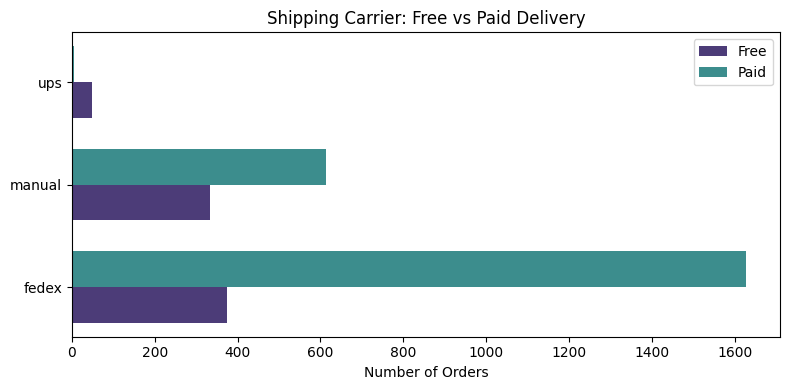

In [546]:
ct_carrier = pd.crosstab(
    df_clean["Orders.shipping_carrier"],
    df_clean["shipping_paid"]
)

# Select only standard methods
main_methods = ["fedex", "manual", "ups"]
ct_main = ct_carrier.loc[main_methods]

#  free or paid
free = ct_main[0].values
paid = ct_main[1].values
methods = ct_main.index.tolist()

# plot
x = np.arange(len(methods))
height = 0.35

plt.figure(figsize=(8, 4))
plt.barh(x - height/2, free, height, label="Free", color="#4C3C78")
plt.barh(x + height/2, paid, height, label="Paid", color="#3C8D8D")

plt.yticks(x, methods)
plt.xlabel("Number of Orders")
plt.title("Shipping Carrier: Free vs Paid Delivery")
plt.legend()

plt.tight_layout()
plt.show()

In [547]:
# ct_carrier = pd.crosstab(
#     df_clean["Orders.shipping_carrier"],
#     df_clean["shipping_paid"]
# )

# # Select only standard methods
# main_methods = ["fedex", "manual", "ups"]
# ct_main = ct_carrier.loc[main_methods]

# #  free or paid
# free = ct_main[0].values
# paid = ct_main[1].values
# methods = ct_main.index.tolist()

# # plot
# x = np.arange(len(methods))
# height = 0.35

# plt.figure(figsize=(8, 4))
# plt.barh(x - height/2, free, height, label="Free", color="#3B5C80")
# plt.barh(x + height/2, paid, height, label="Paid", color="#9BC56E")

# plt.yticks(x, methods)
# plt.xlabel("Number of Orders")
# plt.title("Shipping Carrier: Free vs Paid Delivery")
# plt.legend()

# plt.tight_layout()
# plt.show()

In [245]:
ct_method = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_method"]
)
ct_method.T

shipping_paid,0,1
Orders.shipping_method,,
FEDERAL EXPRESS CORP.,0,1
Free Shipping,300,6
Ground,375,1628
"HOWARD'S EXPRESS, INC.",0,1
INTERNATIONAL FEDEX,0,1
MEDTRANS,0,1
NATIONAL DELIVERY,1,0
NATIONAL DELIVERY SYSTEMS,1,0
ROADWAY EXPRESS,0,1


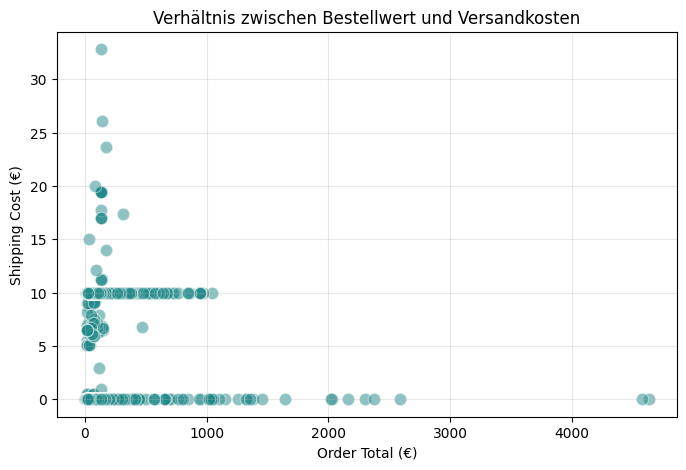

In [551]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_orders,
    x="Orders.total",
    y="Orders.shipping",
    color="#208989",
    s=80,        # більші точки
    alpha=0.5    # більше прозорості
)

plt.xlabel("Order Total (€)")
plt.ylabel("Shipping Cost (€)")
plt.title("Verhältnis zwischen Bestellwert und Versandkosten")
plt.grid(True, alpha=0.3)
# Achsenbereich auf der Y-Achse so begrenzen, dass nur die kostenpflichtigen Lieferungen angezeigt werden (>0)
#plt.ylim(1,35)
plt.show()

C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\3546407983.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\3546407983.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


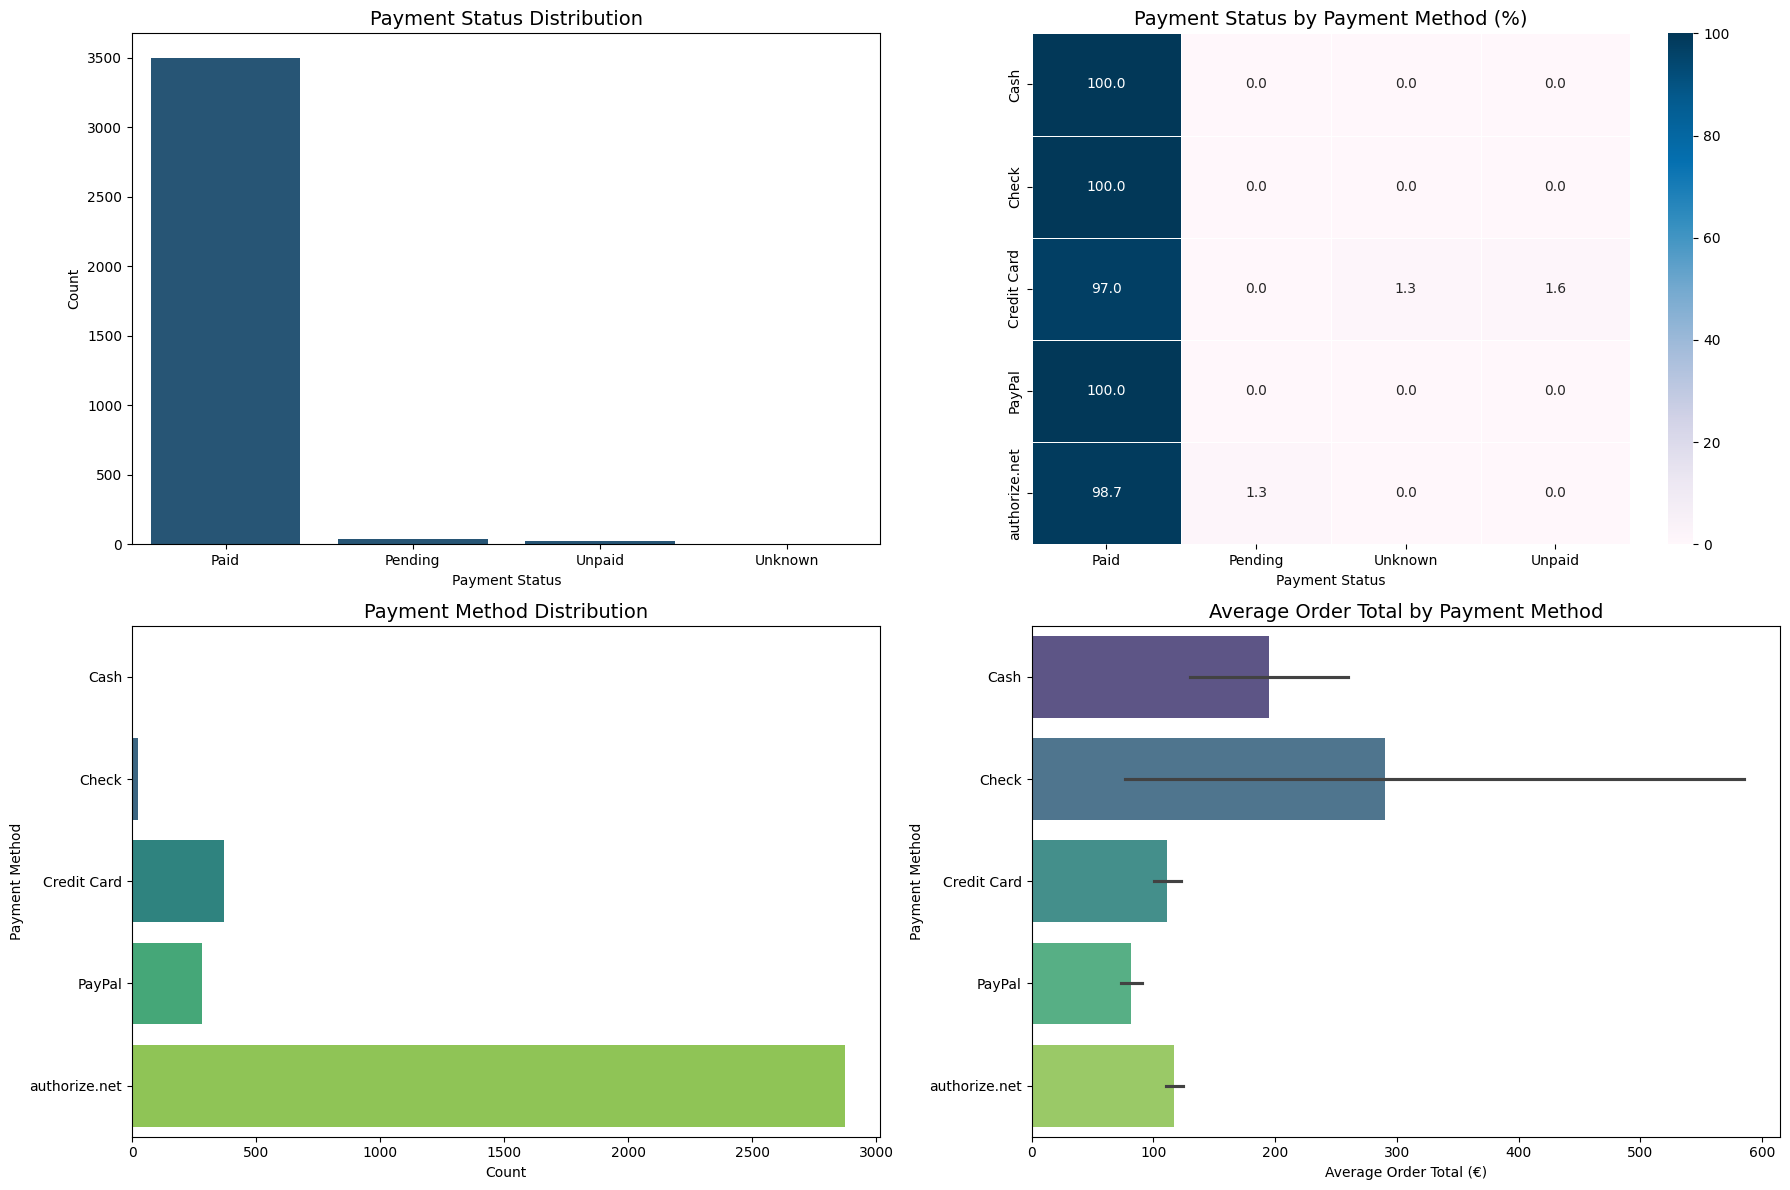

In [ ]:
# --- Єдиний порядок payment_method для графіків 3 і 4 ---
method_order = sorted(df_orders['Orders.payment_method'].dropna().unique())


fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# === 1. Payment Status Distribution ===
sns.countplot(
    data=df_orders,
    x='Orders.payment_status',
    order=df_orders['Orders.payment_status'].value_counts().index,
    ax=axes[0, 0],
    color="#1A5782"
 
)
axes[0, 0].set_title('Payment Status Distribution', fontsize=14)
axes[0, 0].set_xlabel('Payment Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)


# === 2. Heatmap (Payment Status by Payment Method) ===
ct = pd.crosstab(
    df_orders['Orders.payment_method'],
    df_orders['Orders.payment_status'],
    normalize='index'
) * 100

sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap='PuBu',
    linewidths=.5,
    ax=axes[0, 1]
)

axes[0, 1].set_title('Payment Status by Payment Method (%)', fontsize=14)
axes[0, 1].set_xlabel('Payment Status')
axes[0, 1].set_ylabel(' ')


# === 3. Payment Method Distribution (HORIZONTAL, sorted!) ===
sns.countplot(
    data=df_orders,
    y='Orders.payment_method',     # ← категорії тепер по осі Y
    order=method_order,
    ax=axes[1, 0],
    palette="viridis",
)
axes[1, 0].set_title('Payment Method Distribution', fontsize=14)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Payment Method')
axes[1, 0].tick_params(axis='y', rotation=0)


# === 4. Average Order Total by Payment Method (HORIZONTAL) ===
sns.barplot(
    data=df_orders,
    y='Orders.payment_method',     # ← теж по Y
    x='Orders.total',
    estimator='mean',
    order=method_order,
    ax=axes[1, 1],
    palette="viridis",
    alpha=0.9
)
axes[1, 1].set_title('Average Order Total by Payment Method', fontsize=14)
axes[1, 1].set_xlabel('Average Order Total (€)')
axes[1, 1].set_ylabel('Payment Method')
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


'''confidence intervals - довірчі інтервали які seaborn додає за замовчуванням до barplot.
Вони показують:
Наскільки надійна оцінка середнього значення
Наявність варіації / розкиду даних в групі
Якщо лінія дуже довга - дані сильно варіюються (великий розкид значень)
Якщо коротка - середня оцінка стабільна.
'''

In [104]:
### --- outliers investigation --- ORDERs!!!!!
#Filtered High-Value Orders ( >1500€ )

#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

print("----------------------------------------------------------------------\n")
print("                Hochwertige Bestellungen (über 1500 $)       \n")

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]


----------------------------------------------------------------------

                Hochwertige Bestellungen (über 1500 $)       



,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


### **Items**

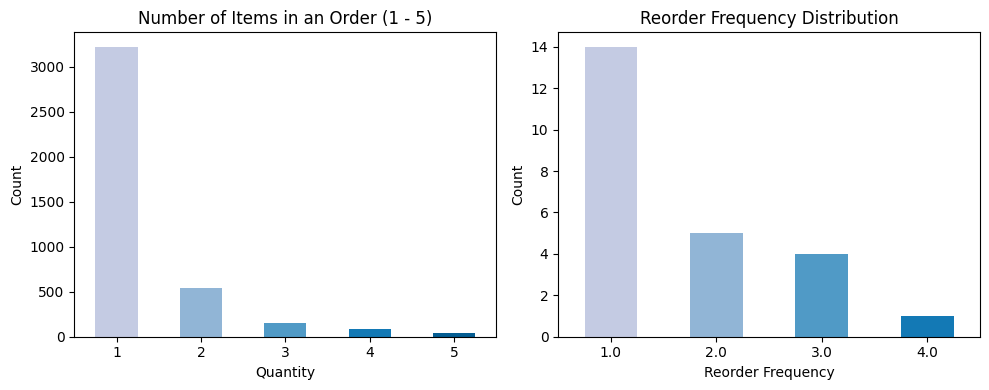

In [205]:
colors = sns.color_palette("PuBu", n_colors=6)[1:]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# -------------------------------
# 1) Кількість товарів у замовленні (1–5)
# -------------------------------
small_qty = df[df['Order_Items.qty'] <= 5]

small_qty['Order_Items.qty'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar', color=colors, ax=axes[0])

axes[0].set_title('Number of Items in an Order (1 - 5)')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# -------------------------------
# 2) Частота повторного замовлення
# -------------------------------
(df_items[df_items['Order_Items.reorder_frequency'].notna()]
    ['Order_Items.reorder_frequency']
    .value_counts()
    .sort_index()
    .plot(kind='bar', color=colors, ax=axes[1]))

axes[1].set_title('Reorder Frequency Distribution')
axes[1].set_xlabel('Reorder Frequency')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


<Axes: xlabel='count', ylabel='avg_price'>

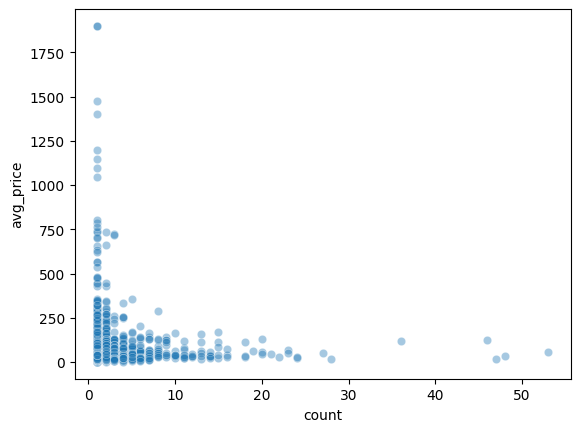

In [206]:
group_product_name = df_items.groupby("Order_Items.product_name").agg(
    count=("Order_Items.id", "count"),
    avg_price=("Order_Items.price", "mean")
)
sns.scatterplot(data=group_product_name, x="count", y="avg_price", alpha=0.4)


### **RFM und CLV**

In [70]:
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], errors='coerce')#прибрати!!!!
# ----------------------------
# 1. Reference date
# ----------------------------
reference_date = df['Orders.placed_date'].max()

# ----------------------------
# 2. Підготовка окремої таблиці замовлень без дублювання
# ----------------------------
orders_unique = df.drop_duplicates(subset='Orders.id').copy()

# Для коректності — гарантуємо правильні типи
orders_unique['Orders.total'] = pd.to_numeric(orders_unique['Orders.total'], errors='coerce')
orders_unique['Orders.placed_date'] = pd.to_datetime(orders_unique['Orders.placed_date'], errors='coerce')

# ----------------------------
# 3. Обчислення RFM
# ----------------------------

# Recency — коли клієнт востаннє зробив замовлення
recency = (reference_date - orders_unique.groupby('Customers.id')['Orders.placed_date'].max()).dt.days
recency = recency.rename('Recency_days')

# Frequency — кількість унікальних замовлень
frequency = orders_unique.groupby('Customers.id')['Orders.id'].nunique()
frequency = frequency.rename('Frequency_orders')

# Monetary — сума унікальних замовлень
monetary = orders_unique.groupby('Customers.id')['Orders.total'].sum()
monetary = monetary.rename('Monetary_total')

# ----------------------------
# 4. Об'єднання в RFM таблицю
# ----------------------------
rfm = pd.concat([recency, frequency, monetary], axis=1).reset_index()

print(rfm.head())
print(rfm.shape)

   Customers.id  Recency_days  Frequency_orders  Monetary_total
0             3           159                 2          108.72
1             4           887                 1           29.55
2             5           614                 3          124.99
3             7           871                 1           49.14
4             8           857                 1           69.70
(3054, 4)


RFM сформований правильно, дублі не вплинули, Money не завищений, Frequency не сплутаний з товарними позиціями.

###  CLV

In [71]:
#Historical CLV
rfm['CLV'] = rfm['Monetary_total']

#CLV (High / Medium / Low) 0.33 та 0.66
rfm['CLV_segment'] = pd.qcut(rfm['CLV'], q=3, labels=['Low', 'Medium', 'High'])


In [73]:
#at risk
# "high recency" = no bay long time -> risk 
# top 20% Recency

threshold = rfm['Recency_days'].quantile(0.80)
rfm['At_risk'] = (rfm['Recency_days'] > threshold).astype(int)


rfm['High_value_at_risk'] = ((rfm['CLV_segment'] == 'High') & 
                             (rfm['At_risk'] == 1)).astype(int)

In [74]:
rfm_sorted = rfm.sort_values('CLV', ascending=False)
top20 = rfm_sorted.head(int(0.2 * len(rfm_sorted)))
top20_revenue_share = top20['CLV'].sum() / rfm['CLV'].sum()
print(f"Top 20% customers generate {top20_revenue_share:.2%} of revenue")

Top 20% customers generate 61.78% of revenue


In [75]:
lost_clv = rfm[rfm['High_value_at_risk'] == 1]['CLV'].sum()
print(f"At Risk segment has ${lost_clv:,.0f} CLV at stake")

At Risk segment has $56,894 CLV at stake


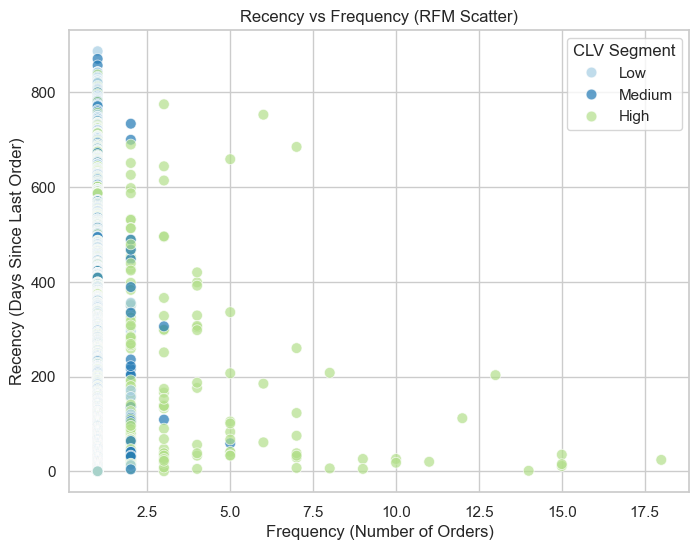

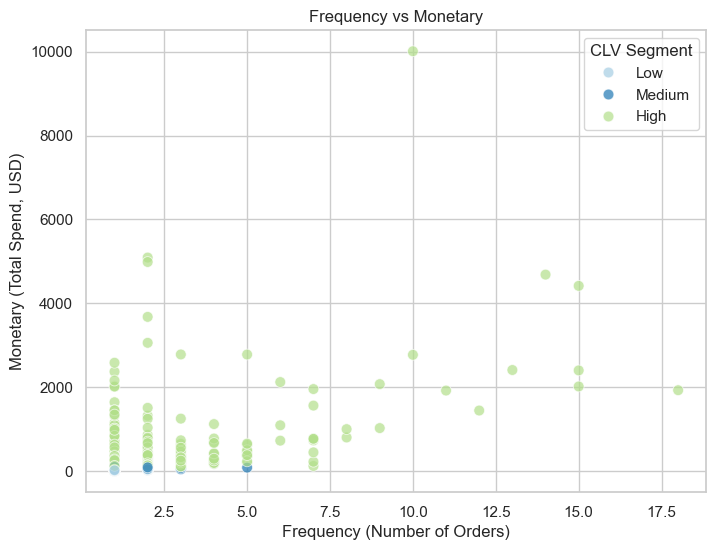

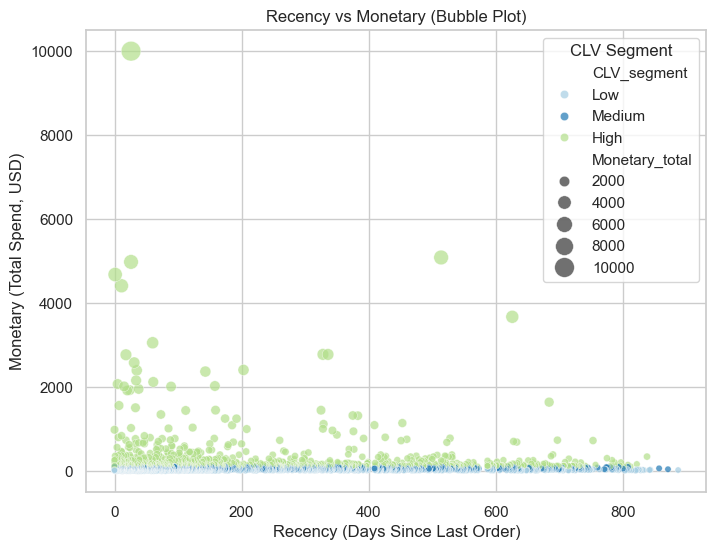

In [105]:
# Уникаємо попереджень
#sns.set(style="whitegrid")

# Кольори для CLV сегментів
palette = {
    'Low': '#a6cee3',
    'Medium': '#1f78b4',
    'High': '#b2df8a'
}

# --------------------------------------------
# 1️⃣ Recency vs Frequency
# --------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='Frequency_orders',
    y='Recency_days',
    hue='CLV_segment',
    palette=palette,
    alpha=0.7,
    s=60
)
plt.title("Recency vs Frequency (RFM Scatter)")
plt.xlabel("Frequency (Number of Orders)")
plt.ylabel("Recency (Days Since Last Order)")
plt.legend(title="CLV Segment")
plt.show()

# --------------------------------------------
# 2️⃣ Frequency vs Monetary
# --------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='Frequency_orders',
    y='Monetary_total',
    hue='CLV_segment',
    palette=palette,
    alpha=0.7,
    s=60
)
plt.title("Frequency vs Monetary")
plt.xlabel("Frequency (Number of Orders)")
plt.ylabel("Monetary (Total Spend, USD)")
plt.legend(title="CLV Segment")
plt.show()

# --------------------------------------------
# 3️⃣ Recency vs Monetary (highlight high-value)
# --------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='Recency_days',
    y='Monetary_total',
    hue='CLV_segment',
    palette=palette,
    alpha=0.7,
    size='Monetary_total',
    sizes=(20, 200),
    legend="brief"
)
plt.title("Recency vs Monetary (Bubble Plot)")
plt.xlabel("Recency (Days Since Last Order)")
plt.ylabel("Monetary (Total Spend, USD)")
plt.legend(title="CLV Segment")
plt.show()

In [127]:
rfm.columns


Index(['Customers.id', 'Recency_days', 'Frequency_orders', 'Monetary_total',
       'CLV', 'CLV_segment', 'At_risk', 'High_value_at_risk', 'Recency_bin',
       'Frequency_bin'],
      dtype='object')

C:\Users\Anna\AppData\Local\Temp\ipykernel_25380\102264402.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = rfm.pivot_table(


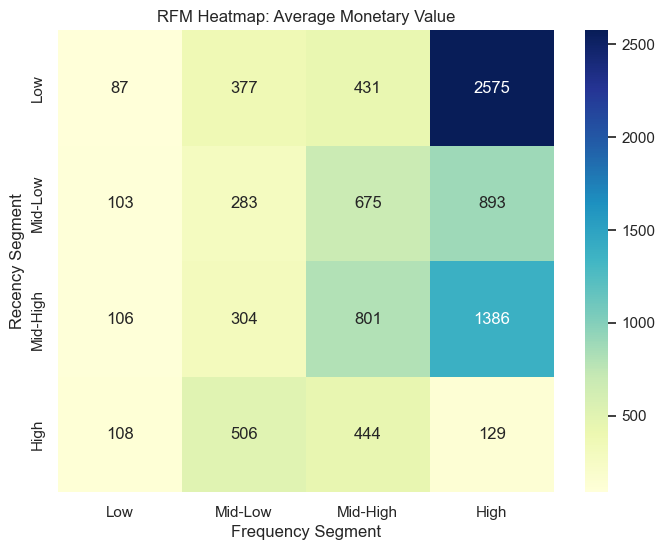

In [106]:
# Recency bins - qcut OK
rfm['Recency_bin'] = pd.qcut(
    rfm['Recency_days'], 
    q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High'],
    duplicates='drop'
)

# Frequency bins – manual to avoid duplicates
rfm['Frequency_bin'] = pd.cut(
    rfm['Frequency_orders'],
    bins=[0, 1, 3, 6, 100],
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)

# Pivot for heatmap
pivot = rfm.pivot_table(
    values='Monetary_total',
    index='Recency_bin',
    columns='Frequency_bin',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("RFM Heatmap: Average Monetary Value")
plt.xlabel("Frequency Segment")
plt.ylabel("Recency Segment")
plt.show()

In [ ]:
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

daily_sales = df_orders.groupby('Orders.placed_date')['Orders.total'].sum().sort_index()
weekly_sales = df_orders.resample('W', on='Orders.placed_date')['Orders.total'].sum()
monthly_sales = df_orders.resample('M', on='Orders.placed_date')['Orders.total'].sum()

C:\Users\Anna\AppData\Local\Temp\ipykernel_25380\3776624375.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_orders.resample('M', on='Orders.placed_date')['Orders.total'].sum()


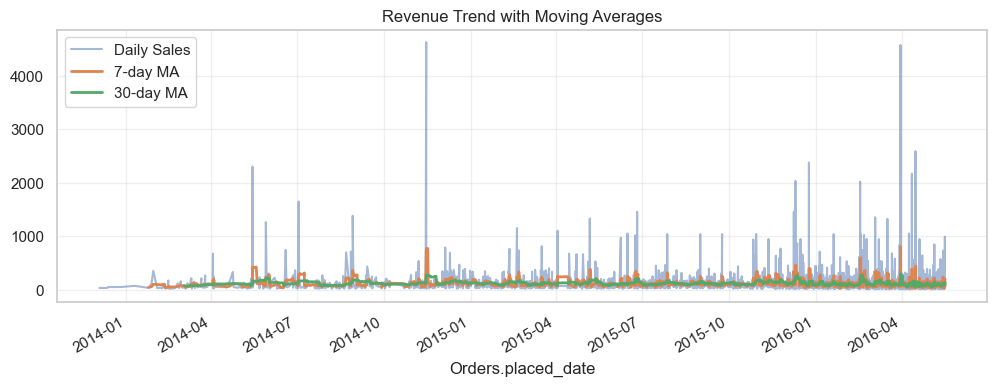

In [110]:
plt.figure(figsize=(12,4))
daily_sales.plot(label='Daily Sales', alpha=0.5)
daily_sales.rolling(7).mean().plot(label='7-day MA', linewidth=2)
daily_sales.rolling(30).mean().plot(label='30-day MA', linewidth=2)
plt.legend()
plt.title("Revenue Trend with Moving Averages")
plt.grid(alpha=0.3)
plt.show()

Moving averages демонструють чіткий тренд зростання продажів протягом 2014–2016 років.
Щоденні продажі характеризуються високою волатильністю через оптові замовлення, але 7-денне і 30-денне середнє показують стабільне збільшення середнього доходу.

In [118]:
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

daily = df_orders.groupby(df_orders['Orders.placed_date'].dt.date)['Orders.total'].sum()
daily.index = pd.to_datetime(daily.index)

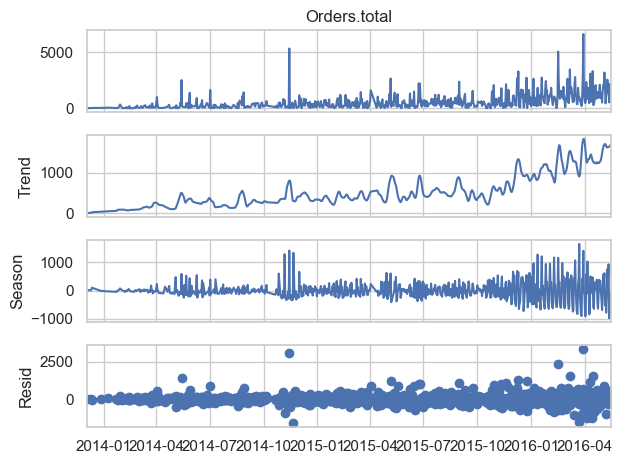

In [119]:
from statsmodels.tsa.seasonal import STL

stl = STL(daily, period=7)
res = stl.fit()
res.plot()
plt.show()


Підсумок у 4 реченнях (в проект.md)

Дані показують чіткий зростаючий тренд продажів протягом 2014–2016 років.
Присутня стабільна тижнева сезонність, яка посилюється з часом.
Велика кількість аномальних днів пов’язана з великими B2B-замовленнями.
Ряд добре піддається трендовому аналізу, але важко моделюється ARIMA через сильні аномалії.

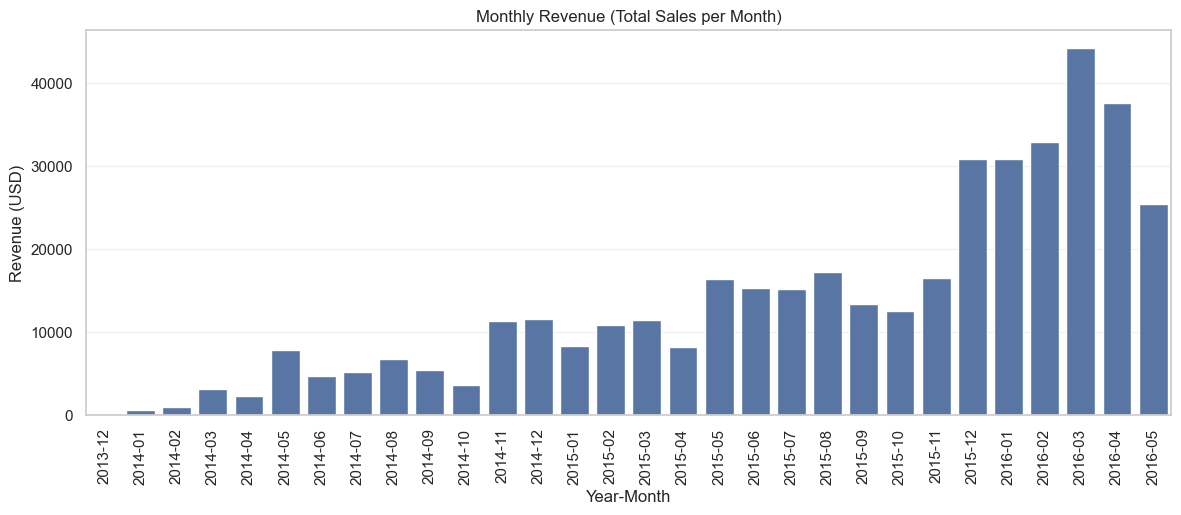

In [120]:
# --- Monthly Revenue from df_orders ---

df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

# Create year-month column
df_orders['year_month'] = df_orders['Orders.placed_date'].dt.to_period('M').astype(str)

# Aggregate revenue
monthly_revenue = (
    df_orders.groupby('year_month')['Orders.total']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 5))
sns.barplot(
    data=monthly_revenue,
    x='year_month',
    y='Orders.total',
    color='#4C72B0'
)

plt.xticks(rotation=90)
plt.title("Monthly Revenue (Total Sales per Month)")
plt.xlabel("Year-Month")
plt.ylabel("Revenue (USD)")
plt.grid(axis='y', alpha=0.3)

plt.show()


### **Products**

### Margin

In [ ]:
### --- outliers investigation --- PRICE!!!!!
#Filtered High-Value Orders ( >1500€ )

#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

print("----------------------------------------------------\n")
print("      Hochwertige Bestellungen (über 1500 $)       \n")
print("----------------------------------------------------\n")

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]


----------------------------------------------------

      Hochwertige Bestellungen (über 1500 $)       

----------------------------------------------------



,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


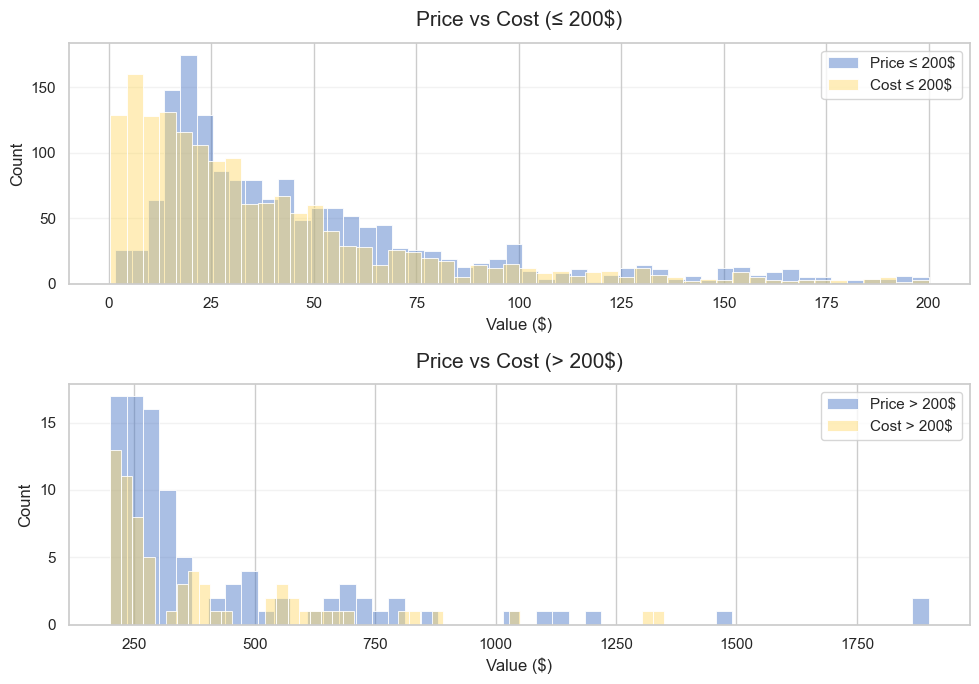

In [125]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=False)

price_color = "#4472C4"   # blue
cost_color  = "#FFD966"   # yellow


# ===== TOP subplot: ≤ 200$ =====
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] <= 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] <= 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

axes[0].set_title("Price vs Cost (≤ 200$)", fontsize=15, pad=12)
axes[0].set_xlabel("Value ($)", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].grid(axis='y', alpha=0.25)
axes[0].legend(["Price ≤ 200$", "Cost ≤ 200$"])


# ===== BOTTOM subplot: > 200$ =====
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] > 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] > 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

axes[1].set_title("Price vs Cost (> 200$)", fontsize=15, pad=12)
axes[1].set_xlabel("Value ($)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].grid(axis='y', alpha=0.25)
axes[1].legend(["Price > 200$", "Cost > 200$"])


plt.tight_layout()
plt.show()


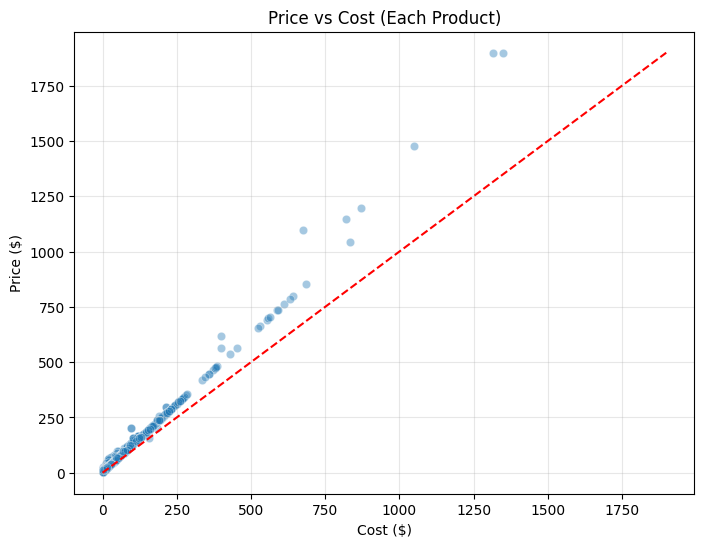

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="Products.price",
    alpha=0.4
)

# Red line ->  price=cost (ohne Margin)
max_val = max(df_products["Products.price"].max(), df_products["Products.cost"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")

plt.xlabel("Cost ($)")
plt.ylabel("Price ($)")
plt.title("Price vs Cost (Each Product)")
plt.grid(alpha=0.3)
plt.show()

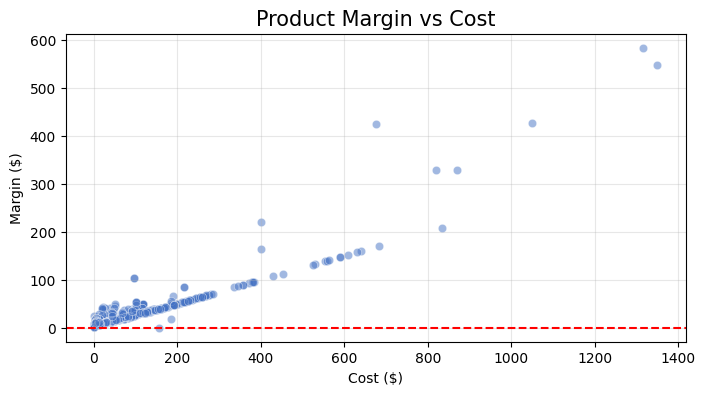

In [558]:
df_products["margin"] = (
    df_products["Products.price"] - df_products["Products.cost"]
)

plt.figure(figsize=(8, 4))

sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5,
    color="#4472C4"
)

plt.axhline(0, color="red", linestyle="--")  # лінія нульової маржі

plt.title("Product Margin vs Cost", fontsize=15)
plt.xlabel("Cost ($)")
plt.ylabel("Margin ($)")
plt.grid(alpha=0.3)
plt.show()


In [559]:
# plt.figure(figsize=(8, 4))

# sns.histplot(
#     df_products["margin"].dropna(),
#     bins=50,
#     color="#FFD966",
#     edgecolor="white",
#     alpha=0.7
# )

# plt.title("Distribution of Product Margin (Price - Cost)", fontsize=15)
# plt.xlabel("Margin ($)")
# plt.ylabel("Count")
# plt.grid(axis='y', alpha=0.25)
# plt.show()


In [ ]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]
df_products["margin_perc"] = (df_products["margin"] / df_products["Products.cost"]) * 100

top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin", "margin_perc"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)
top_margin

,Products.name,Products.price,Products.cost,margin,margin_perc
1211,Battery Powered Electric Patient Lift with Rec...,1899.00,1315.00,584.00,44.410646
884,Cirrus Plus EC Folding Power Wheelchair,1899.00,1350.00,549.00,40.666667
119,Titan Transportable Front Wheel Power Wheelchair,1475.00,1049.00,426.00,40.610105
1708,Spitfire EX Compact Travel Power Mobility Scoo...,1099.00,675.00,424.00,62.814815
365,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1149.00,819.00,330.00,40.293040
452,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1199.00,869.00,330.00,37.974684
1323,Hydraulic Patient Lift with Six Point Cradle,620.00,399.99,220.01,55.003875
571,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1043.75,835.00,208.75,25.000000
889,CircuFlow Lymphedema Pumps,855.14,684.11,171.03,25.000365
1100,Bellavita Auto Bath Tub Chair Seat Lift,565.00,399.99,165.01,41.253531


In [485]:
# # 1. Створюємо колонку маржі
# df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

# # 2. Вибираємо топ-10 товарів
# top_abs_margin = (
#     df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
#     .sort_values(by="margin", ascending=False)
#     .head(10)
# )

# # 3. Будуємо barplot
# plt.figure(figsize=(10, 6))

# sns.barplot(
#     data=top_abs_margin,
#     x="margin",
#     y="Products.name",
#     palette="cividis"
# )

# plt.title("Top 10 Products by Margin (Price - Cost)", fontsize=15, pad=10)
# plt.xlabel("Margin ($)")
# plt.ylabel("Product Name")

# plt.grid(axis="x", alpha=0.25)
# plt.tight_layout()
# plt.show()


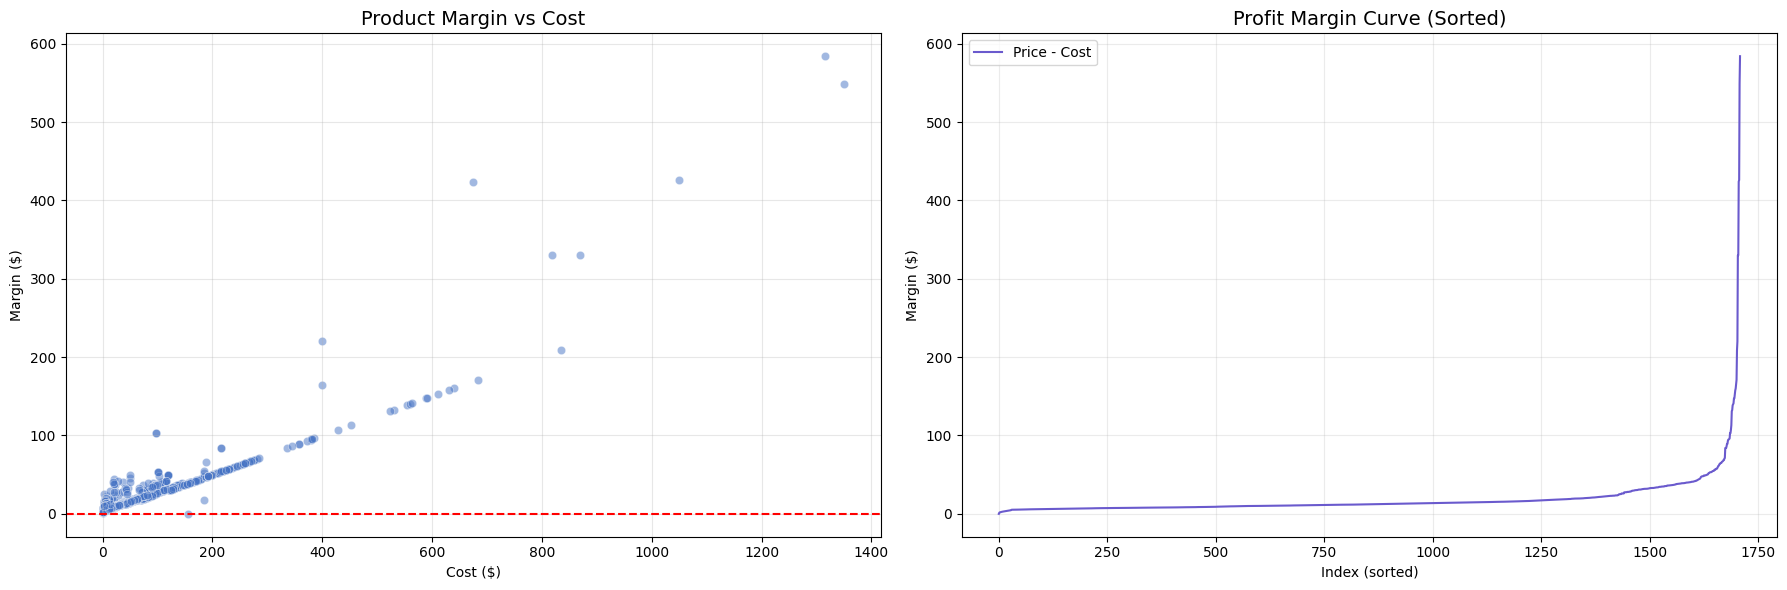

In [556]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax1, ax2 = axes


# === 1 (old 1): Scatter: Margin vs Cost ===
sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5,
    color="#4472C4",
    ax=ax1
)
ax1.axhline(0, color="red", linestyle="--")
ax1.set_title("Product Margin vs Cost", fontsize=14)
ax1.set_xlabel("Cost ($)")
ax1.set_ylabel("Margin ($)")
ax1.grid(alpha=0.3)


# === 2 (old 3): Line plot: Sorted Margin Curve ===
diff_sorted = df_products["margin"].dropna().sort_values().reset_index(drop=True)

ax2.plot(diff_sorted, color="#6A5ACD", label="Price - Cost")
ax2.set_title("Profit Margin Curve (Sorted)", fontsize=14)
ax2.set_xlabel("Index (sorted)")
ax2.set_ylabel("Margin ($)")
ax2.grid(alpha=0.25)
ax2.legend()


plt.tight_layout()
plt.show()


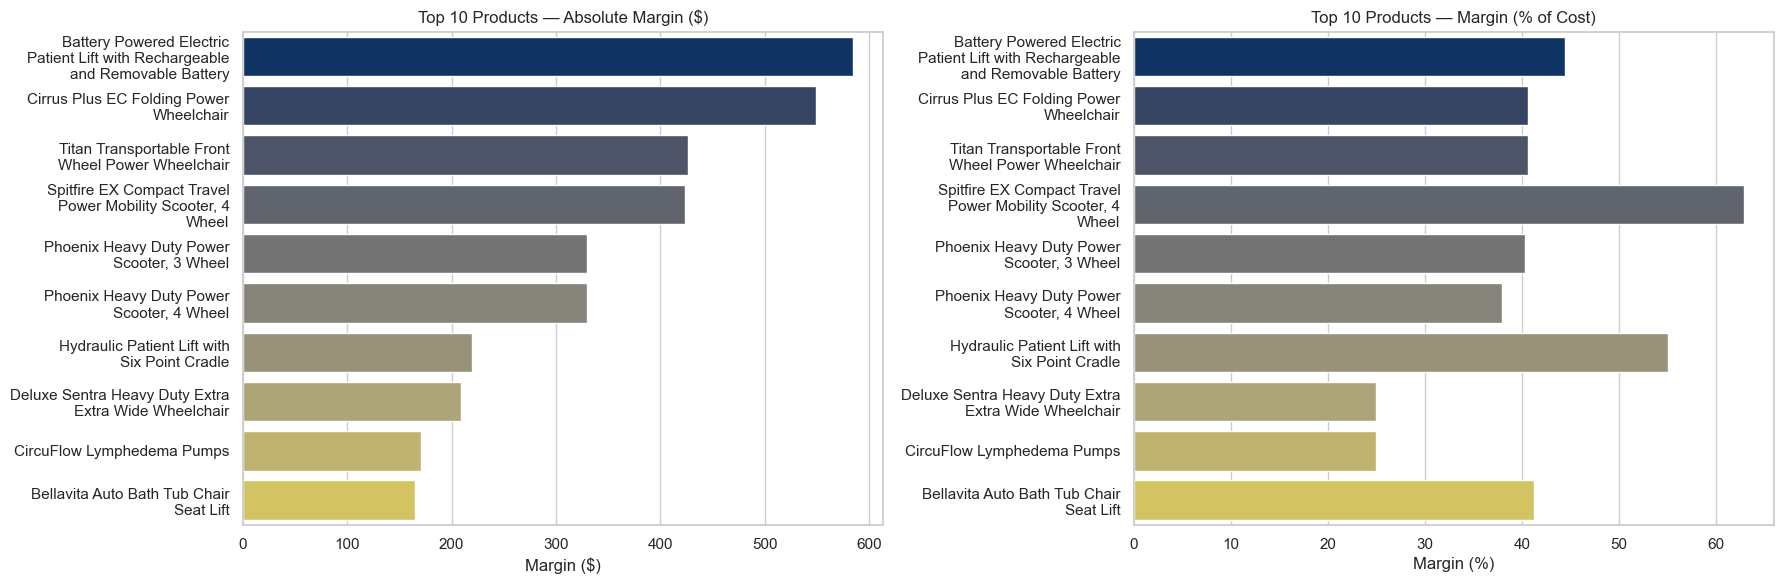

In [ ]:
# df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]
# df_products["margin_perc"] = (df_products["margin"] / df_products["Products.cost"]) * 100

top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin", "margin_perc"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)

top_margin["label"] = top_margin["Products.name"].apply(lambda x: fill(x, width=30))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# --- 1. Абсолютна маржа ---
sns.barplot(
    data=top_margin,
    x="margin",
    y="label",
    hue="label",
    palette="cividis",
    legend=False,
    ax=ax1
)
ax1.set_title("Top 10 Products — Absolute Margin ($)")
ax1.set_xlabel("Margin ($)")
ax1.set_ylabel("")
#ax1.grid(axis="x", alpha=0.25)


# --- 2. Відсоткова маржа ---
sns.barplot(
    data=top_margin,
    x="margin_perc",
    y="label",
    hue="label",
    palette="cividis",
    legend=False,
    ax=ax2
)
ax2.set_title("Top 10 Products — Margin (% of Cost)")
ax2.set_xlabel("Margin (%)")
ax2.set_ylabel("")
#ax2.grid(axis="x", alpha=0.25)

plt.tight_layout()
plt.show()

In [481]:
# top_abs = (
#     df_products[["Products.name", "Products.price", "Products.cost", "margin", "margin_pct"]]
#     .sort_values(by="margin", ascending=False)
#     .head(10)
# )

# top_abs

In [480]:
# top_pct = (
#     df_products[["Products.name", "Products.price", "Products.cost", "margin", "margin_pct"]]
#     .sort_values(by="margin_pct", ascending=False)
#     .head(10)
# )

# top_pct

In [482]:

# # Перенос назв у нові колонки
# top_abs["label"] = top_abs["Products.name"].apply(lambda x: fill(x, width=30))
# top_pct["label"] = top_pct["Products.name"].apply(lambda x: fill(x, width=30))

# fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# # === Х1: Топ-10 за абсолютною маржею ===
# sns.barplot(
#     data=top_abs,
#     x="margin",
#     y="label",
#     hue="label",
#     palette="cividis",
#     legend=False,
#     ax=axes[0]
# )
# axes[0].set_title("Top 10 Products — Highest Absolute Margin ($)")
# axes[0].set_xlabel("Margin ($)")
# axes[0].set_ylabel("")
# axes[0].grid(axis="x", alpha=0.25)


# # === Х2: Топ-10 за % маржею ===
# sns.barplot(
#     data=top_pct,
#     x="margin_pct",
#     y="label",
#     hue="label",
#     palette="magma",
#     legend=False,
#     ax=axes[1]
# )
# axes[1].set_title("Top 10 Products — Highest Margin (% of Cost)")
# axes[1].set_xlabel("Margin (%)")
# axes[1].set_ylabel("")
# axes[1].grid(axis="x", alpha=0.25)

# plt.tight_layout()
# plt.show()

In [52]:
# --- Частота значень ---
status_counts = df_products['Products.status'].value_counts().sort_values(ascending=False)
vendor_counts = df_products['Products.vendor'].value_counts().sort_values(ascending=False)



In [ ]:
# хітмап по вендорам

# cr_vendor_prod = pd.crosstab(df_products['Products.status'], 
#                        df_products['Products.vendor'],
#                        normalize='index') * 100
# #cr_vendor_prod.round(1)


# plt.figure(figsize=(8, 5))
# sns.heatmap(
#     cr_vendor_prod.T, 
#     cmap="PuBu", 
#     annot=True, 
#     fmt=".1f"
# )

# plt.title("Products Status vs Vendor (%)", fontsize=14)
# plt.xlabel("")
# plt.ylabel("")``
# plt.tight_layout()
# plt.show()

In [ ]:
import statsmodels.formula.api as smf

rfm['made_reorder'] = (rfm['Frequency_orders'] > 1).astype(int)

#додаємо бізнес ознаку

rfm = rfm.merge(
    df_customers[['Customers.id', 'is_business']],
    on='Customers.id',
    how='left'
) 

# var.1

In [ ]:
# var.2
# 
import statsmodels.formula.api as smf

df_customers['is_business'] = (df_customers['Customers.company'] != 'Individual').astype(int)
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])
reference_date = df_orders['Orders.placed_date'].max() + pd.Timedelta(days=1)

rfm_c = df_orders.groupby('Orders.customer_id').agg(
    Recency_days = ('Orders.placed_date', lambda x: (reference_date - x.max()).days),
    Frequency_orders = ('Orders.id', 'count'),
    Monetary_total = ('Orders.total', 'sum')
).reset_index()

# Підготовка таблиці з ознаками клієнтів
cust = df_customers[['Customers.id', 'is_business']].copy()

# Поєднуємо RFM + інформацію про клієнта - rfm_c
rfm_c = rfm_c.merge(cust, left_on='Orders.customer_id', right_on='Customers.id', how='left')

# Прибираємо дублікати колонок
rfm_c.drop(columns=['Customers.id'], inplace=True)


rfm_c['made_reorder'] = (rfm_c['Frequency_orders'] > 1).astype(int)


In [169]:
model = smf.logit(
    formula='made_reorder ~ Recency_days',
    data=rfm
)

results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.261943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3052
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                0.007295
Time:                        21:46:07   Log-Likelihood:                -799.97
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 0.0006060
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.2754      0.098    -23.255      0.000      -2.467      -2.084
Recency_days    -0.0012

In [170]:
model2 = smf.logit(
    formula='made_reorder ~ Recency_days + Monetary_total',
    data=rfm
)

results2 = model2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.223257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3051
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                  0.1539
Time:                        21:46:09   Log-Likelihood:                -681.83
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 1.366e-54
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9366      0.122    -24.094      0.000      -3.176      -2.698
Recency_days     

In [181]:
model = smf.logit(
    formula='made_reorder ~ Recency_days + Monetary_total + is_business',
    data=rfm
)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.223085
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3050
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                  0.1546
Time:                        21:49:55   Log-Likelihood:                -681.30
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 1.022e-53
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9064      0.125    -23.264      0.000      -3.151      -2.662
Recency_days     

In [185]:
mean_monetary = rfm['Monetary_total'].mean()
mean_business = rfm['is_business'].mean()

In [186]:
X = pd.Series(range(rfm['Recency_days'].min(), rfm['Recency_days'].max() + 1))

X_df = pd.DataFrame({
    'Recency_days': X,
    'Monetary_total': mean_monetary,
    'is_business': mean_business
})

In [ ]:
p_y = results.predict(X_df) 

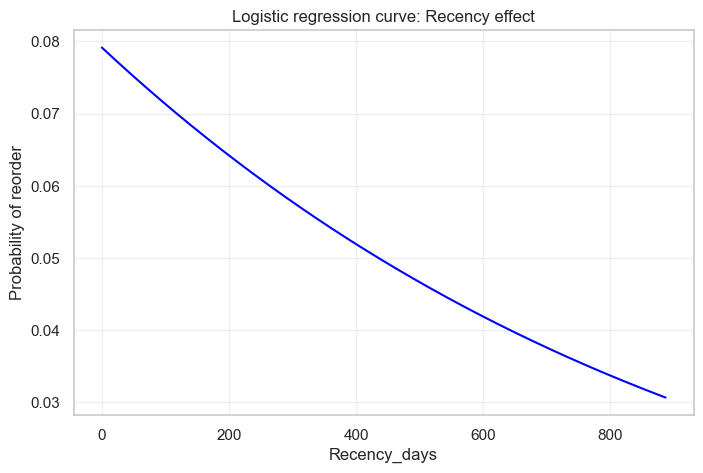

In [189]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X, p_y, color='blue')

ax.set_title("Logistic regression curve: Recency effect")
ax.set_xlabel("Recency_days")
ax.set_ylabel("Probability of reorder")
ax.grid(alpha=0.3)

plt.show()

In [183]:
rfm_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Orders.customer_id  3054 non-null   object 
 1   Recency_days        3054 non-null   int64  
 2   Frequency_orders    3054 non-null   int64  
 3   Monetary_total      3054 non-null   float64
 4   is_business         3054 non-null   int64  
 5   made_reorder        3054 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 143.3+ KB


In [184]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customers.id        3054 non-null   object  
 1   Recency_days        3054 non-null   int64   
 2   Frequency_orders    3054 non-null   int64   
 3   Monetary_total      3054 non-null   float64 
 4   CLV                 3054 non-null   float64 
 5   CLV_segment         3054 non-null   category
 6   At_risk             3054 non-null   int64   
 7   High_value_at_risk  3054 non-null   int64   
 8   Recency_bin         3054 non-null   category
 9   Frequency_bin       3054 non-null   category
 10  made_reorder        3054 non-null   int64   
 11  is_business         3054 non-null   int64   
dtypes: category(3), float64(2), int64(6), object(1)
memory usage: 224.3+ KB



**зробити**
- топ продуктів, проданих на більшу суму (по загальному дф рахувати)
- топ продуктів з найбільшею маржею в абсолюті


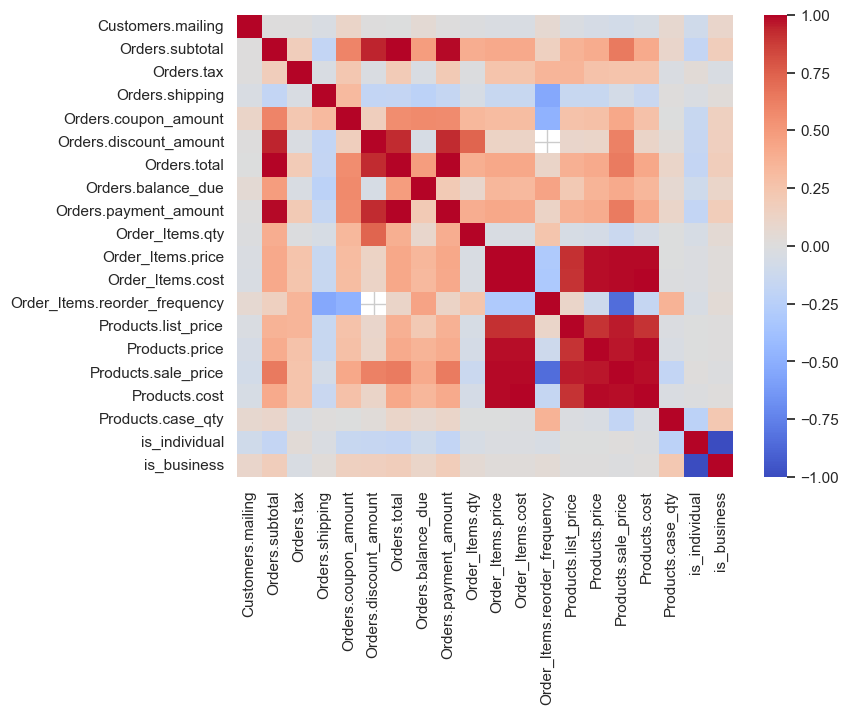

In [143]:
plt.figure(figsize=(8, 6), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.show()

In [144]:
whos

Variable                  Type                       Data/Info
--------------------------------------------------------------
LinearSegmentedColormap   type                       <class 'matplotlib.colors<...>LinearSegmentedColormap'>
STL                       type                       <class 'statsmodels.tsa.stl._stl.STL'>
adf_result                tuple                      n=6
adfuller                  function                   <function adfuller at 0x0000026901ACF7E0>
axes                      ndarray                    2: 2 elems, type `object`, 16 bytes
backup_df                 DataFrame                  Shape: (4194, 55)
backup_df_customers       DataFrame                  Shape: (3054, 7)
backup_df_items           DataFrame                  Shape: (4194, 8)
backup_df_orders          DataFrame                  Shape: (3565, 24)
backup_df_products        DataFrame                  Shape: (1710, 16)
business_company          int                        428
business_customers    